   position             team    points       won      lost      draw  \
0         1        Barcelona  1.052884  2.447295 -1.616686 -0.518105   
1         2  Atlético Madrid  0.390624  0.778485 -1.171997  1.308559   
2         3      Real Madrid  0.324398  1.404289 -0.282619 -0.822549   
3         4          Osasuna  0.258172  0.361282 -1.171997  1.917447   
4         5   Sporting Gijón  0.191946  0.569884 -0.727308  1.004115   

     played  goals_for  goals_against  goal_difference     year  
0  0.777873   1.681568      -1.174658         0.127172  1990-91  
1  0.777873   0.273950      -1.573703         0.081101  1990-91  
2  0.777873   0.977759      -0.855422         0.080440  1990-91  
3  0.777873  -0.301894      -1.094849         0.032922  1990-91  
4  0.777873   0.145984      -0.855422         0.042444  1990-91  
(204, 11)
position             int64
team                object
points             float64
won                float64
lost               float64
draw               float64

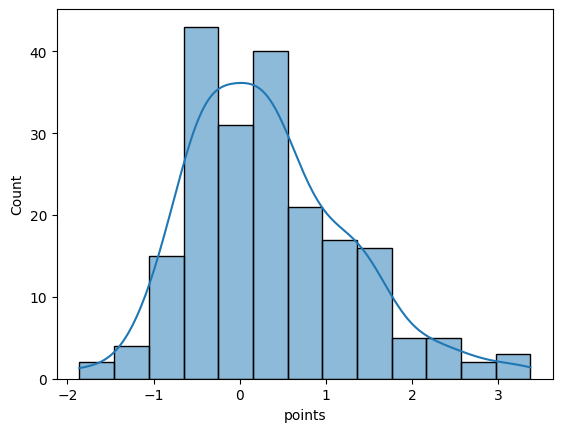

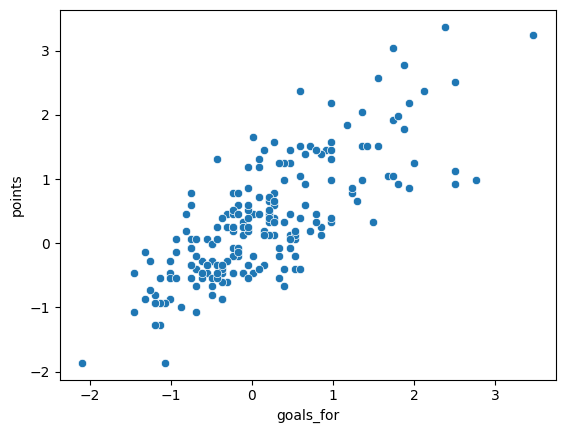

C:\Users\Sneha\AppData\Local\Temp\ipykernel_23188\3420832092.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')


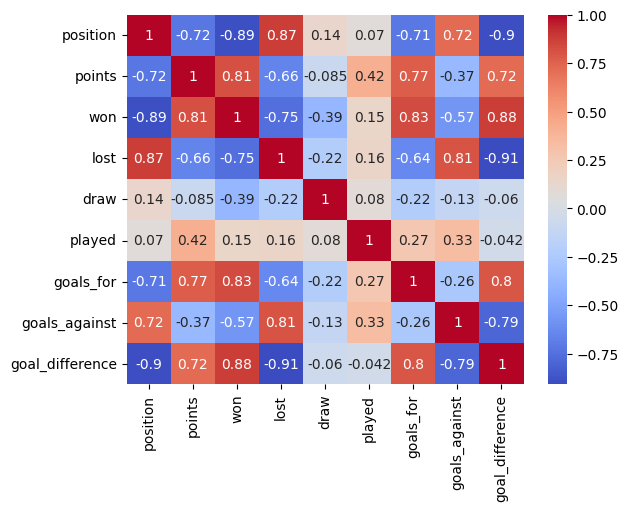

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
arr=[]
year1=1990
year2=1991
while(year1!=2000):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data/"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'draw', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()

sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')
plt.show()


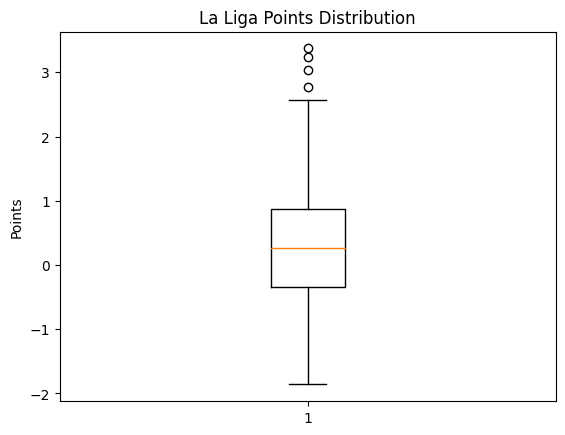

Outliers:
   position             team    points       won      lost      draw  \
0         1  Atlético Madrid  3.039666  2.655896 -1.394342  0.090783   
1         2         Valencia  2.774761  2.655896 -0.504963 -1.126993   
0         1      Real Madrid  3.370796  2.864498 -2.061375  0.699671   
1         2        Barcelona  3.238344  3.073099 -1.171997 -0.822549   

     played  goals_for  goals_against  goal_difference     year  
0  1.905619   1.745551      -1.254467         0.133741  1995-96  
1  1.905619   1.873516       0.261903         0.070318  1995-96  
0  1.905619   2.385377      -0.935231         0.148385  1996-97  
1  1.905619   3.473082       0.022476         0.154323  1996-97  


In [9]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')

plt.show()

q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

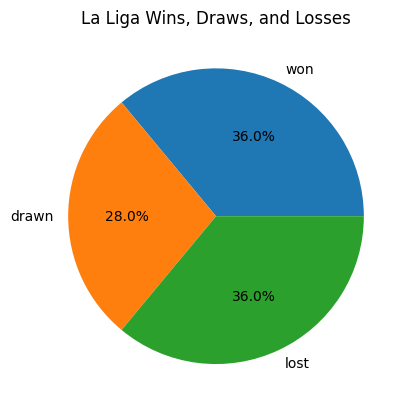

In [10]:
arr=[]
year1=1990
year2=1991
while(year1!=2000):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()